In [1]:
import numpy as np
import os 
from PIL import Image
import struct

In [2]:
class MImage:
  
    def __init__(self, path: str = None, arr: np.array = None):
        if (path != None):
            self.img = Image.open(path).convert('L') 
            self.arr = np.array(self.img)#.astype(np.uint16)
        elif(arr != None):
            self.img = Image.fromarray(arr)
            self.arr = arr  
                 
    def OpenJpg(self, path : str):
        self.img = Image.open(path).convert('L') 
        self.arr = np.array(self.arr)
    
    def OpenXcr(self, path: str, offset: int, size: tuple):
        file=open(path, "rb")
        data = file.read()
        cuts = data[offset:]
        floatarr = struct.unpack('>'+'H'*size[0]*size[1], cuts)
        self.arr = np.array(floatarr).reshape(size[0], size[1]).astype(np.uint16)
        self.img = Image.fromarray(self.arr)
        self.ToGray()
        
    def SaveJpg(self, path: str):
        self.img.save(path)

    def Shift(self, c: int):
        n = len(self.arr)
        m = len(self.arr[0])
        res = np.zeros((n, m)).astype(np.uint16) #чтобы было возможно 255+
        for i in range(0, n):
            for j in range(0, m):
                res[i, j] =  self.arr[i, j] + c
        self.arr = res
        self.img = Image.fromarray(self.arr)

    def Multi(self, c: float):
        n = len(self.arr)
        m = len(self.arr[0])
        for i in range(0, n):
            for j in range(0, m):
                self.arr[i, j] *= c
        self.img = Image.fromarray(self.arr)
        
    def Show(self):
        self.img = Image.fromarray(self.arr.astype(np.uint8))
        return self.img
    
    def ToGray(self):
        maximum = np.max(self.arr)
        minimum = np.min(self.arr)
        diff = maximum - minimum
        
        n = len(self.arr)
        m = len(self.arr[0])
        res = np.zeros((n, m))
        i = 0       
        for row in self.arr:
            res[i] = np.array([np.floor((y - minimum) * 255 / diff) for y in row])
            i+=1
            
        self.arr = res.astype(np.uint8)
        self.img = Image.fromarray(self.arr).convert('L') 
        
    def Resize(self, scale, resample_type = Image.BILINEAR ):
        """
        resample_type values: [Image.NEAREST, Image.BILINEAR]
        """
        new_height = int(len(self.arr) * scale)
        new_width = int(len(self.arr[0]) * scale)
        
        new_image = self.img.resize((new_width, new_height), resample_type)
        
        self.img = new_image
        self.arr = np.array(self.img)
        
    def Rotate(self, k=1):
        self.arr = np.rot90(self.arr, k)
        self.img = Image.fromarray(self.arr)
        
    def Negative(self):
        L = np.max(self.arr)
        res = self.arr.copy()
        i = 0
        for row in res:
            res[i] = np.array([L - r - 1 for r in row])
            i += 1
        self.arr = res
        self.img = Image.fromarray(self.arr)
        
    def Log_transformation(self, c):
        if (c <= 0): 
            raise "Transformation error"
        i = 0
        n = len(self.arr)
        m = len(self.arr[0])
        res = np.zeros((n, m))
        for row in self.arr:
            self.arr[i] = np.array([np.uint16(c*np.log10(r + 1)) for r in row])#.astype(np.uint16)
            i += 1
        self.img = Image.fromarray(self.arr)
        
    def Gamma_transformation(self, c, gamma):
        i = 0
        for row in self.arr:
            self.arr[i] = np.array([np.uint16(c*np.power(r, gamma)) for r in row])#.astype(np.uint16)
            i += 1
        self.img = Image.fromarray(self.arr)
        

# Визуализация

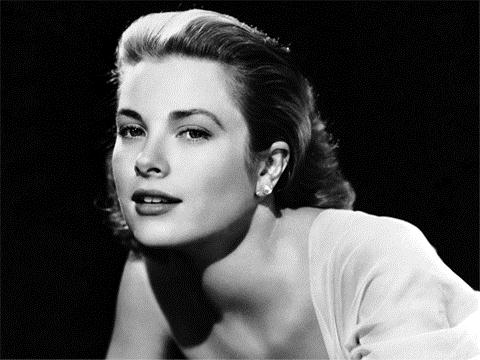

In [3]:
grace = MImage('grace.png')
grace.Show()

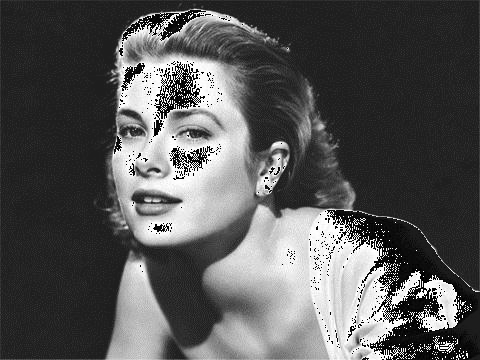

In [4]:
grace.Shift(30)
grace.Show()

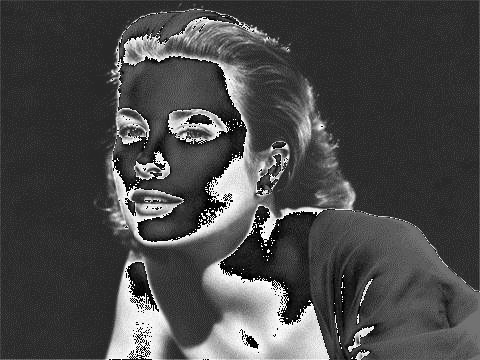

In [5]:
grace.Multi(1.3)
grace.Show()

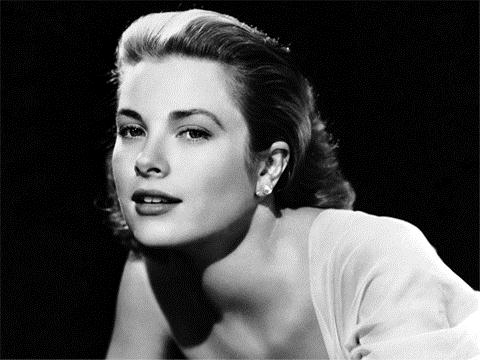

In [6]:
grace.ToGray()
grace.Show()

# Визуализация *.xcr

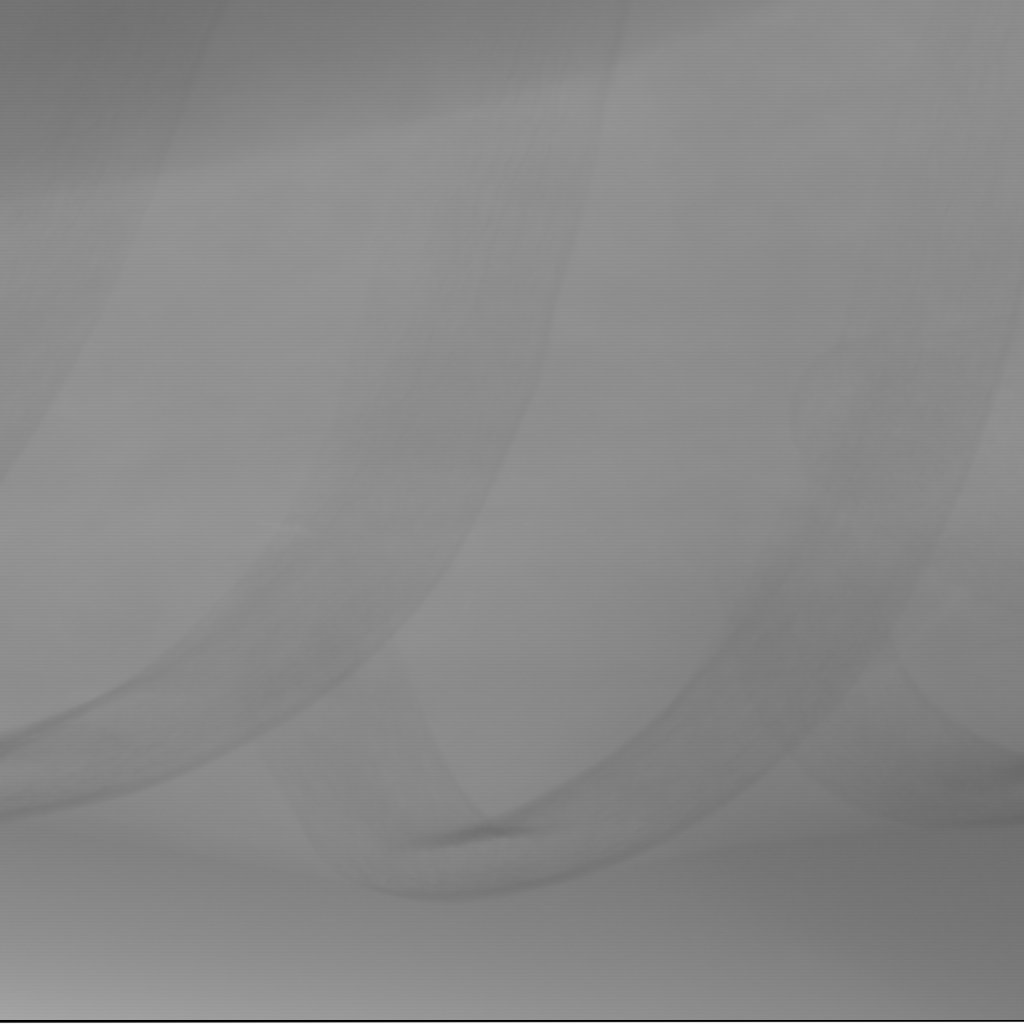

In [7]:
first = MImage()
first.OpenXcr("c12-85v.xcr", 10240, (1024, 1024))
first.Show()

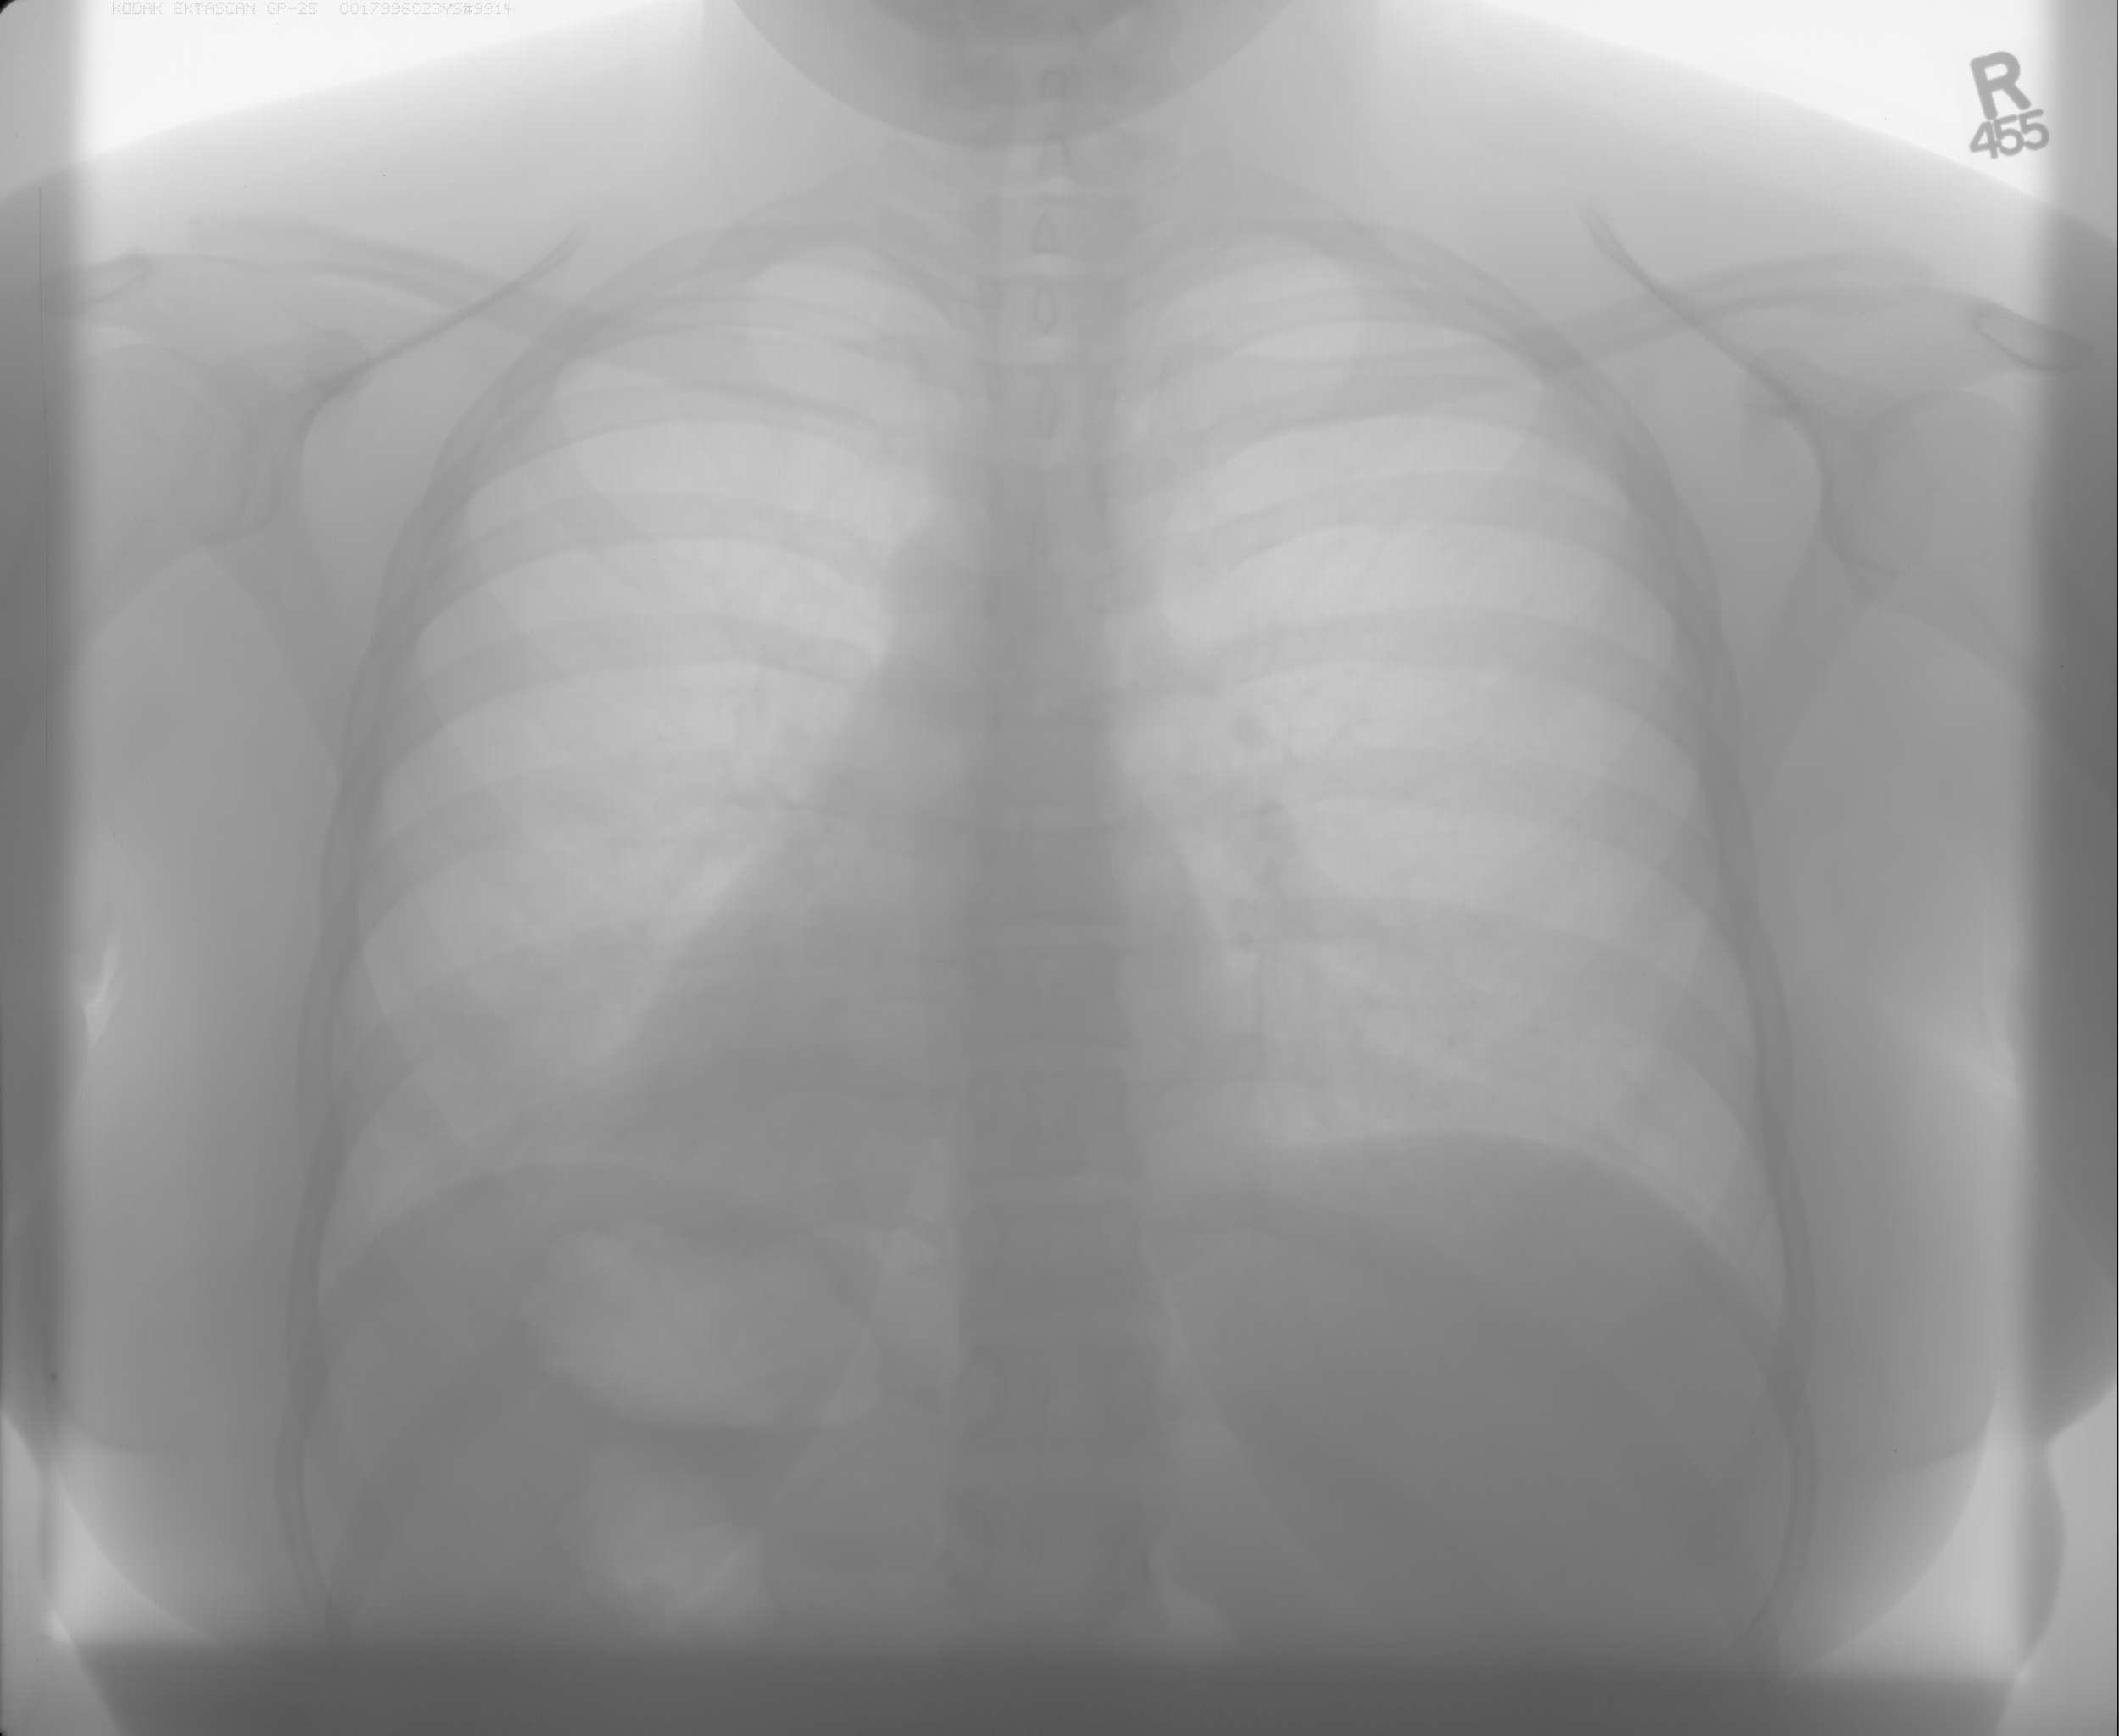

In [8]:
second = MImage()
second.OpenXcr("u0.xcr", 10240, (2500, 2048))
second.Rotate()
second.Show()

# Изменение размеров

(624, 468)


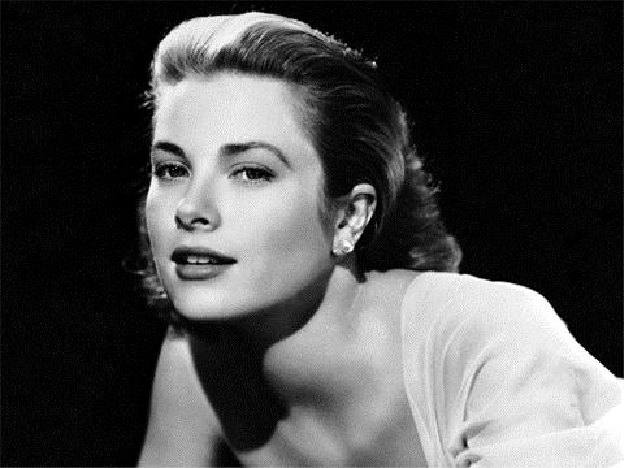

In [9]:
grace.Resize(1.3, Image.NEAREST)
print(grace.img.size)
grace.Show()

(624, 468)


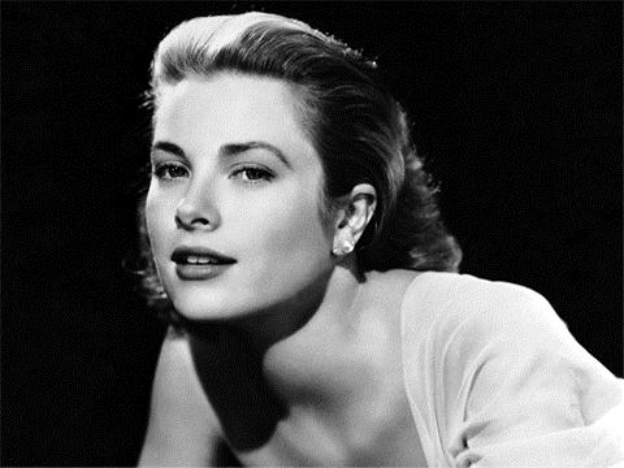

In [10]:
grace = MImage('grace.png')
grace.Resize(1.3, Image.BILINEAR)
print(grace.img.size)
grace.Show()

(614, 614)


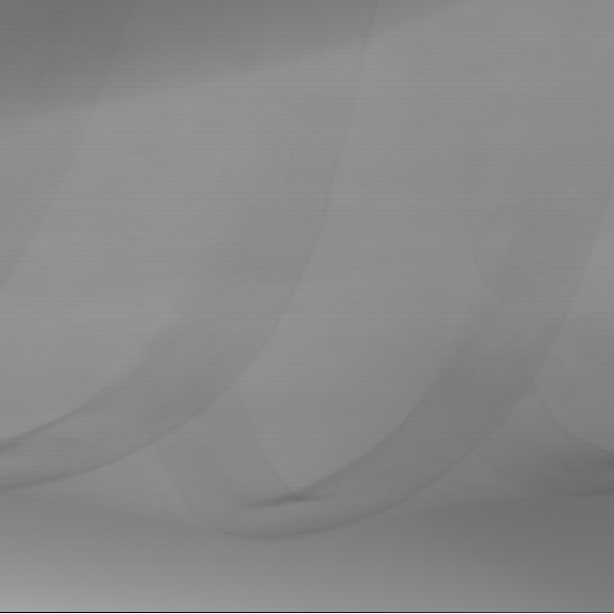

In [11]:
first.Resize(0.6, Image.NEAREST)
print(first.img.size)
first.Show()

(614, 614)


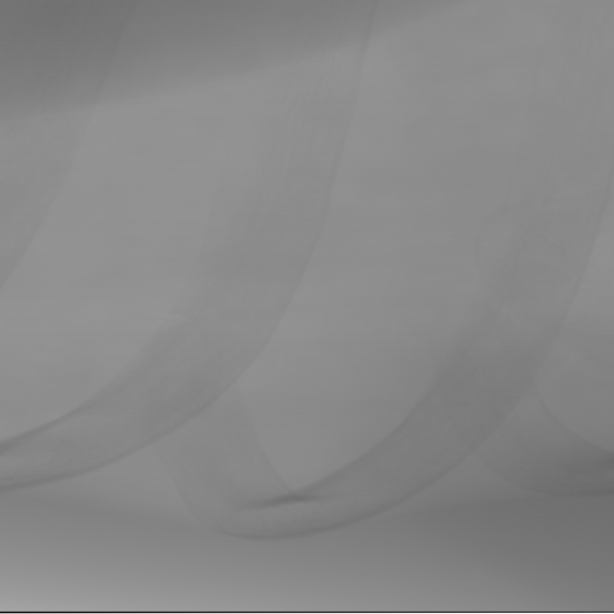

In [12]:
first = MImage()
first.OpenXcr("c12-85v.xcr", 10240, (1024, 1024))
first.Resize(0.6, Image.BILINEAR)
print(first.img.size)
first.Show()

(1500, 1228)


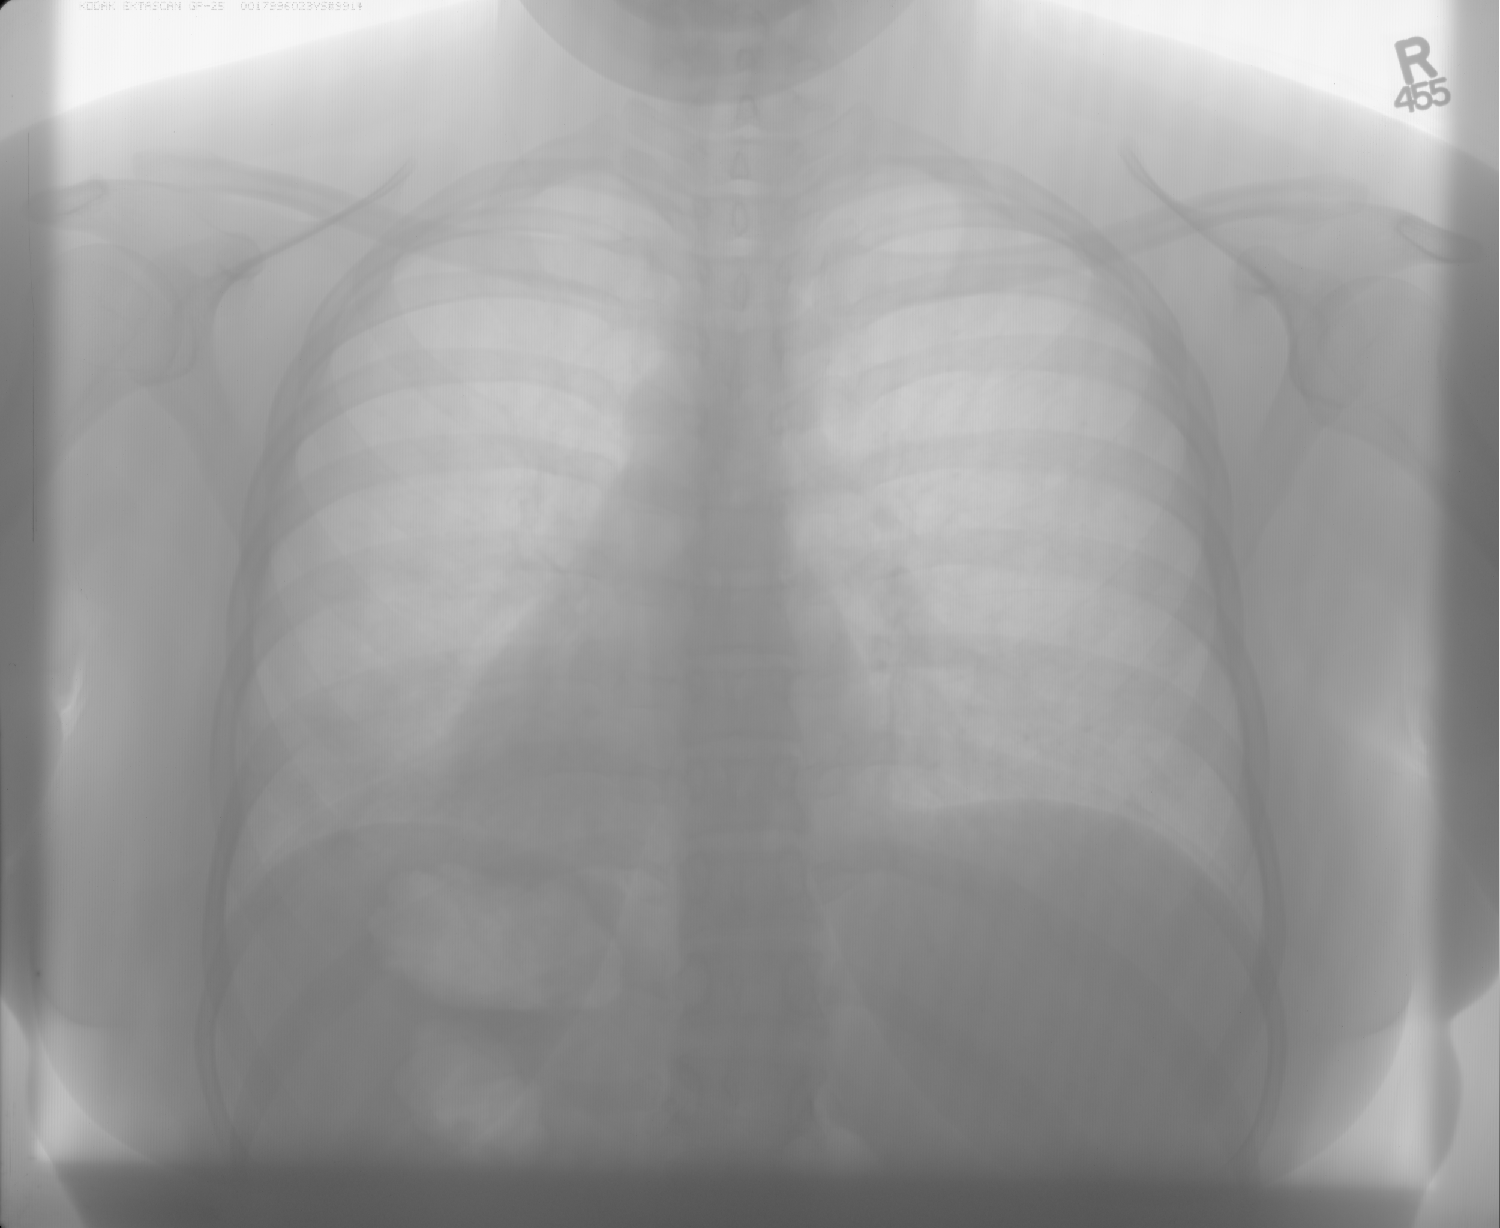

In [13]:
second.Resize(0.6, Image.NEAREST)
print(second.img.size)
second.Show()

(1500, 1228)


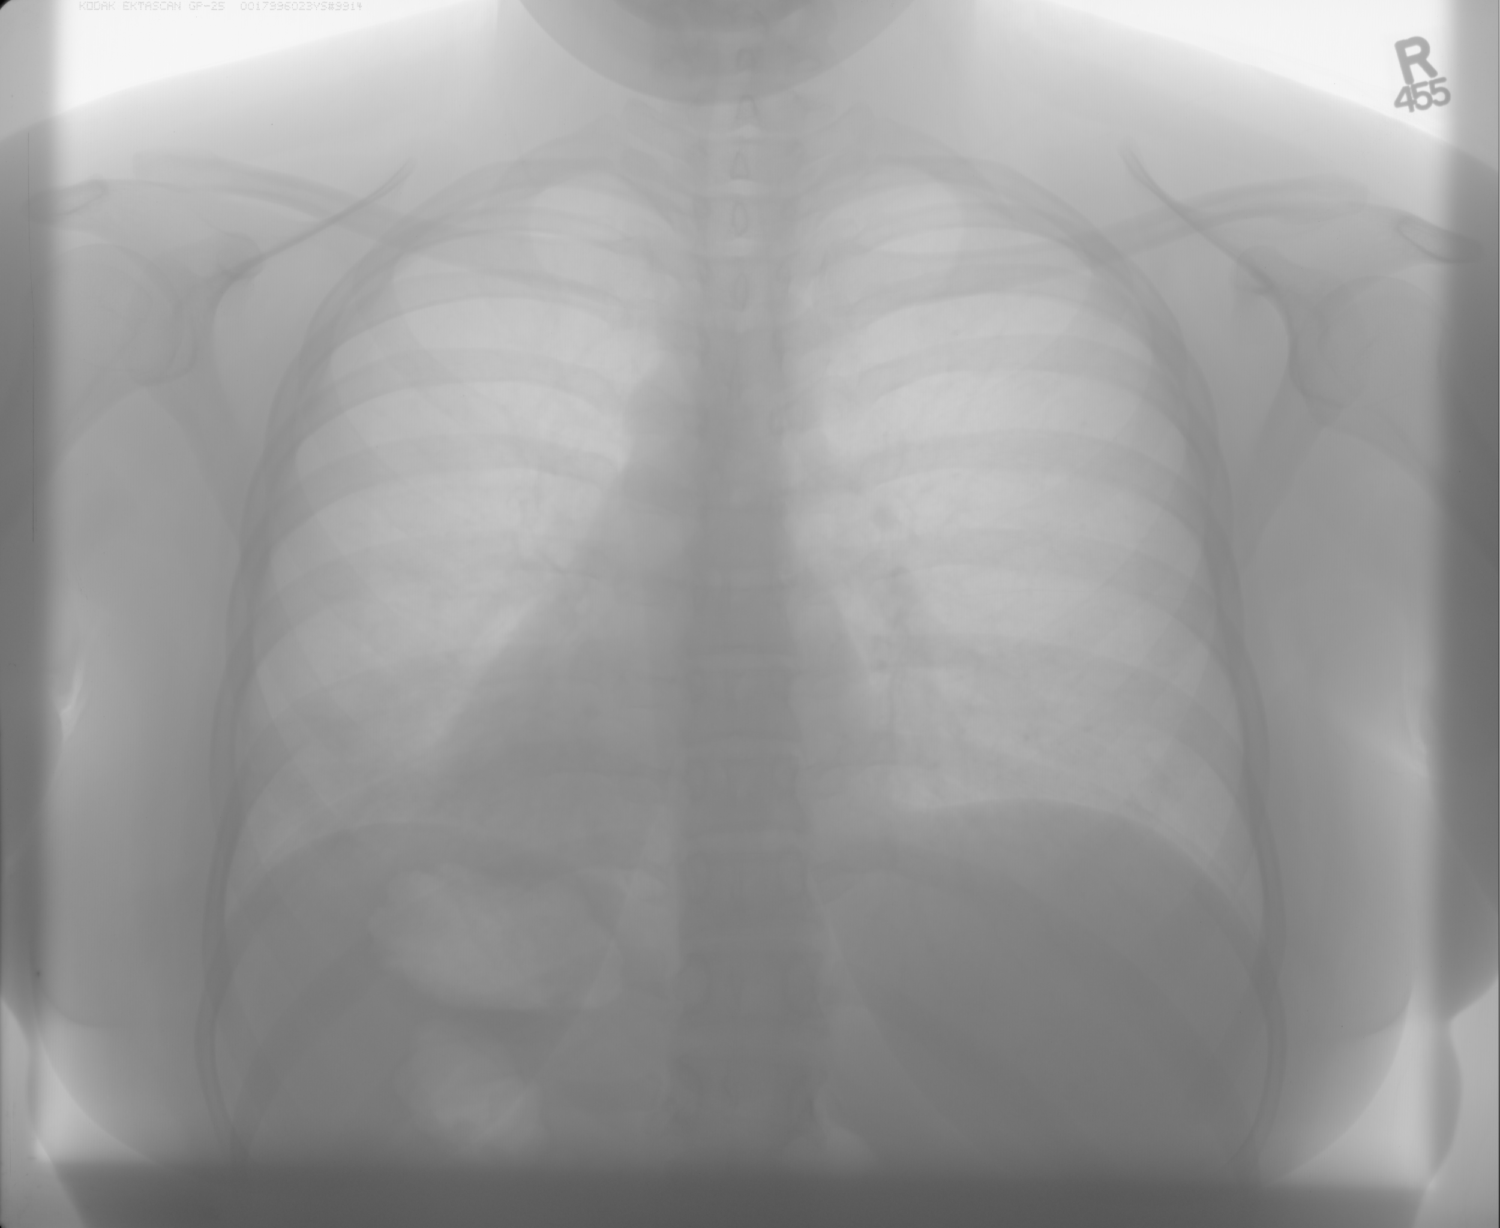

In [14]:
second = MImage()
second.OpenXcr("u0.xcr", 10240, (2500, 2048))
second.Rotate()
second.Resize(0.6, Image.BILINEAR)
print(second.img.size)
second.Show()

# Градационные преобразования
## Негатив

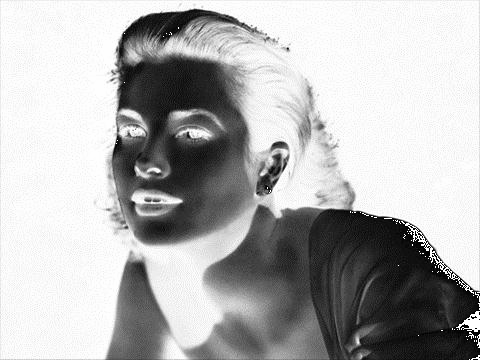

In [15]:
grace = MImage('grace.png')
grace.Negative()
grace.Show()

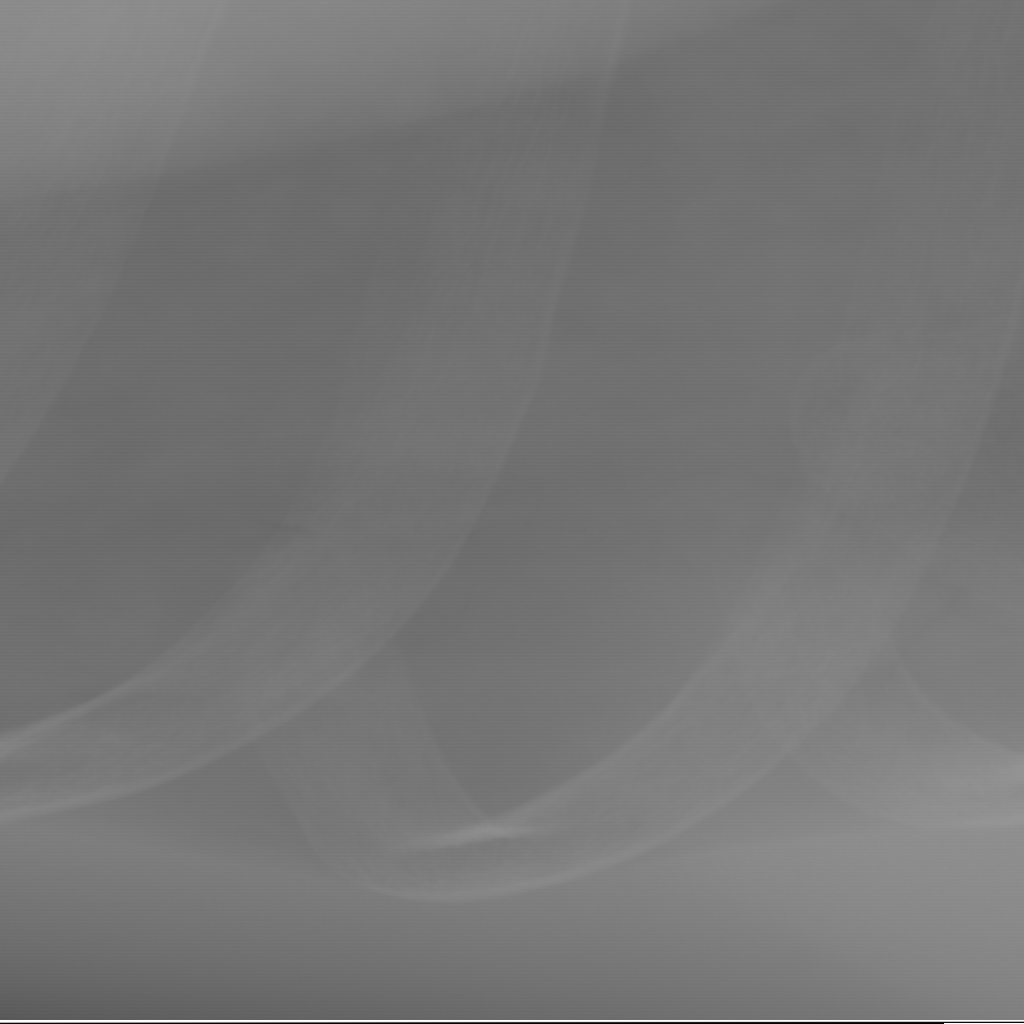

In [16]:
first = MImage()
first.OpenXcr("c12-85v.xcr", 10240, (1024, 1024))
first.Negative()
first.Show()

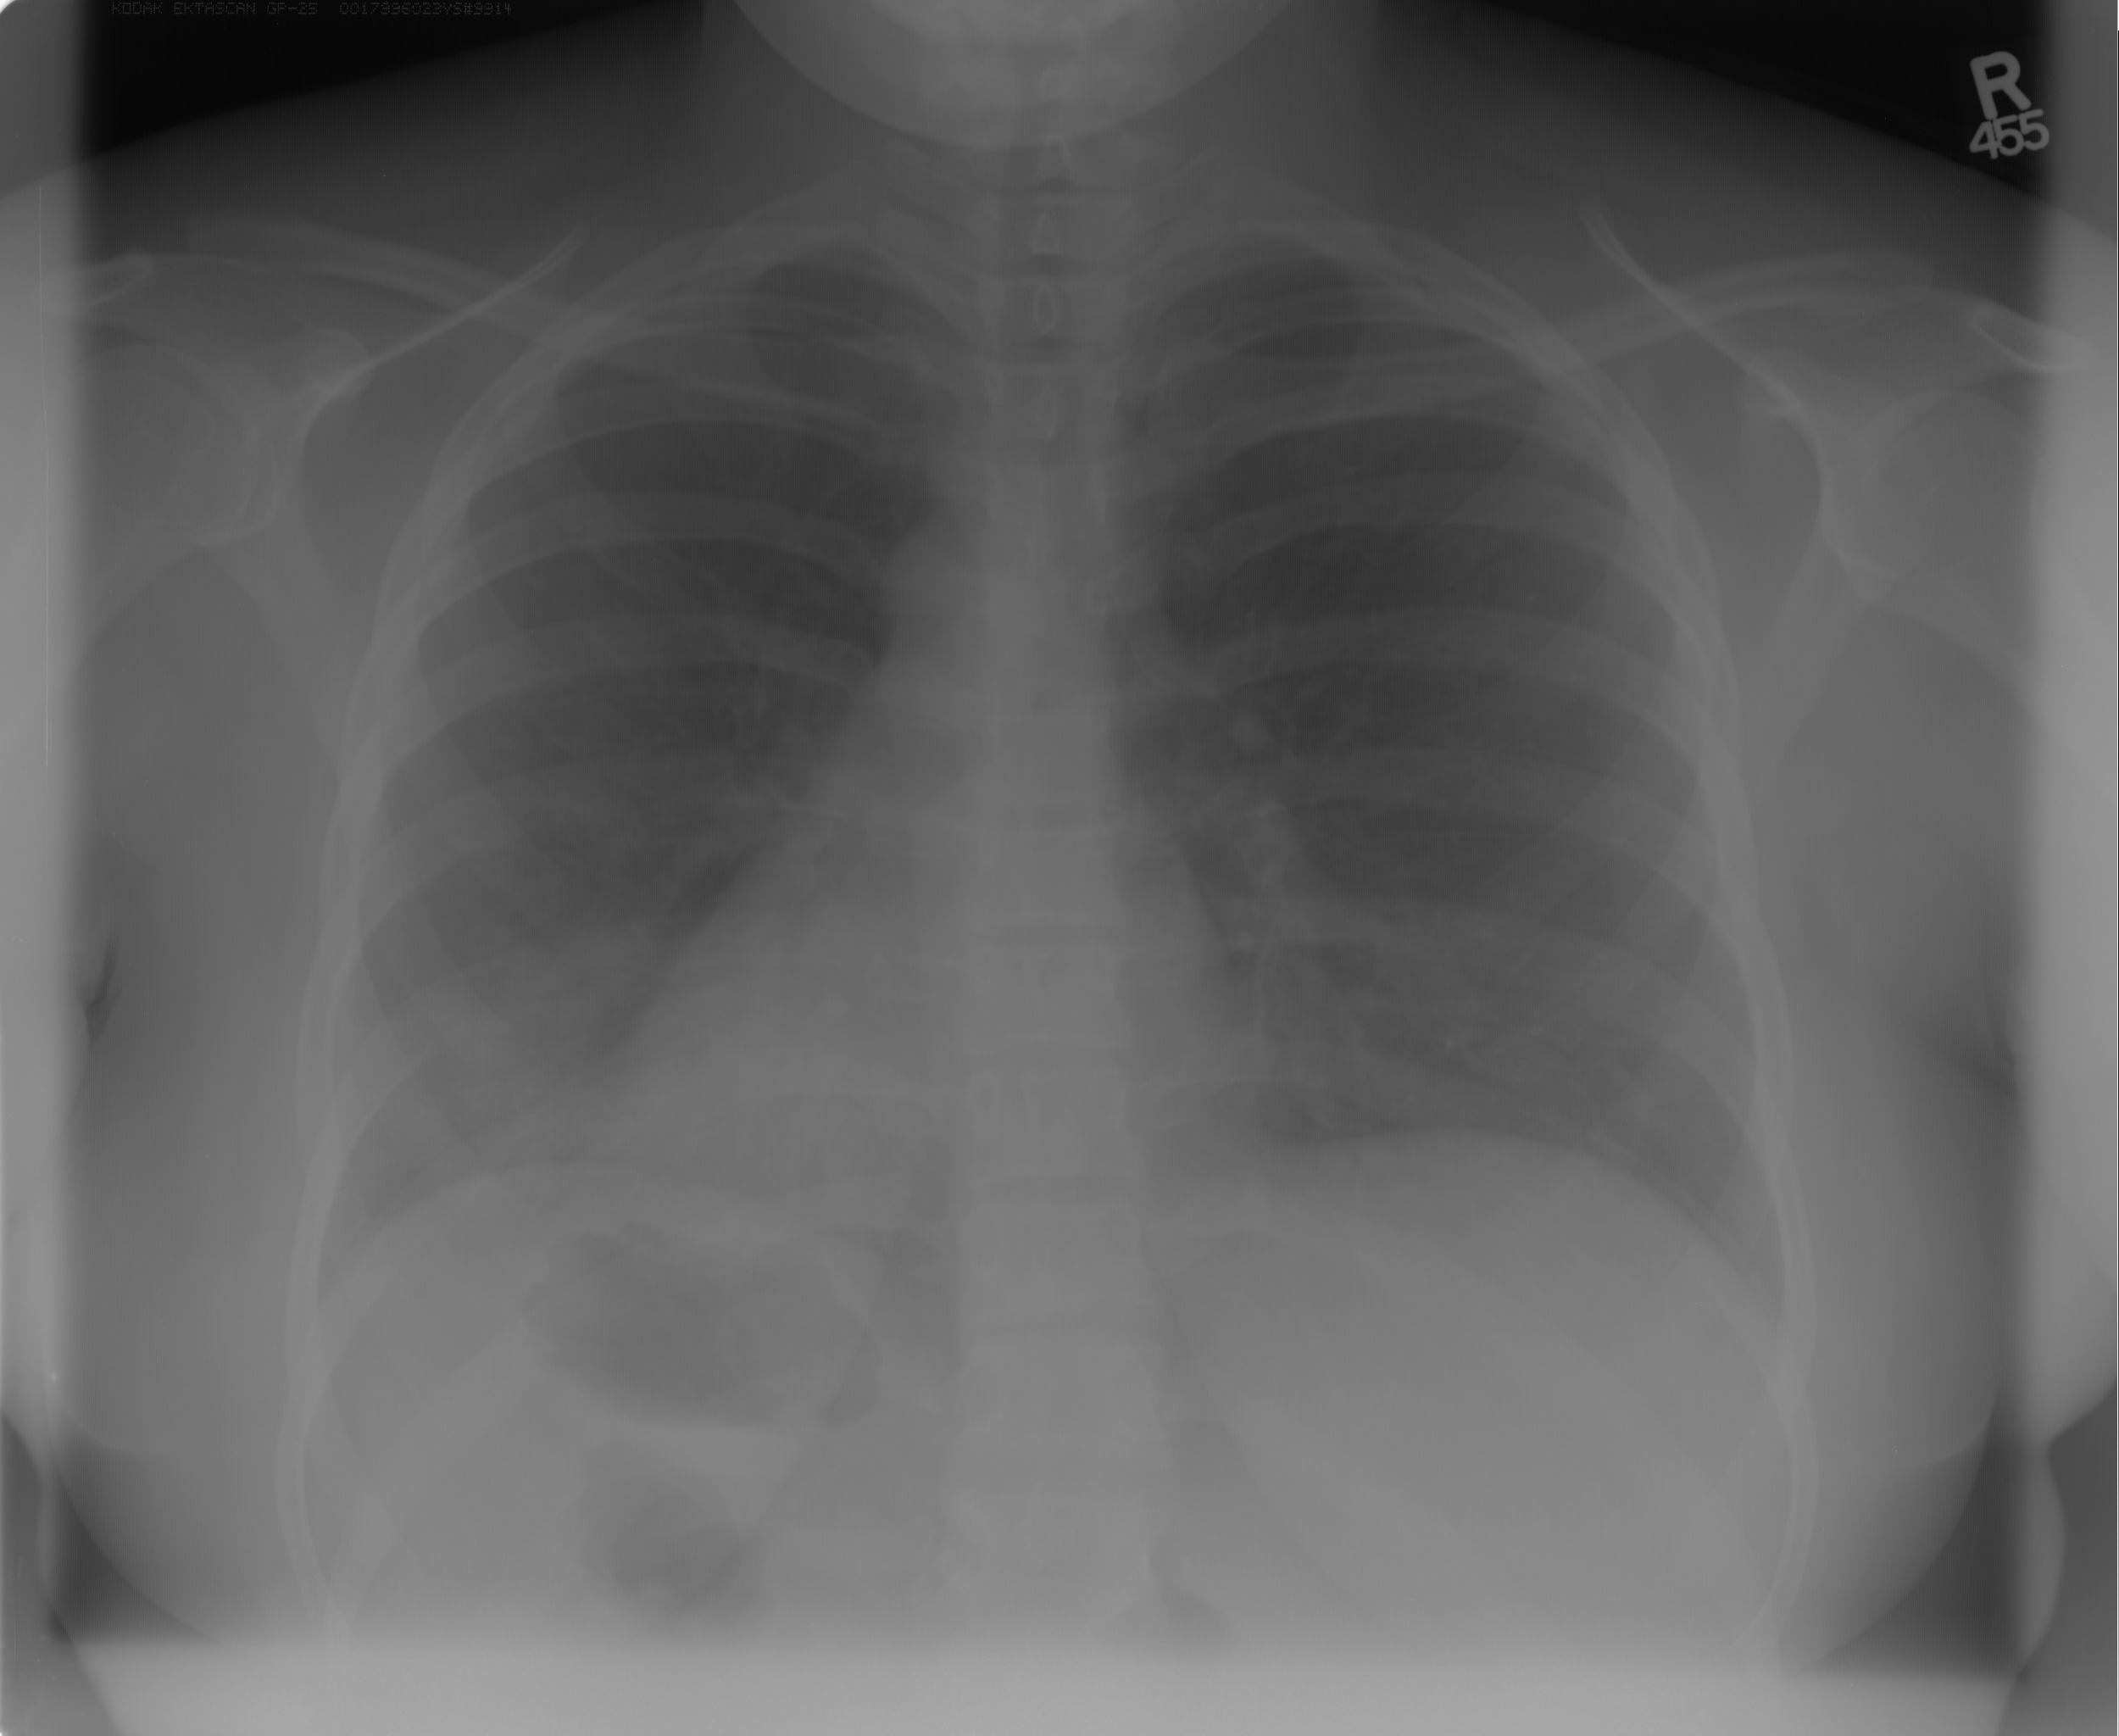

In [17]:
second = MImage()
second.OpenXcr("u0.xcr", 10240, (2500, 2048))
second.Rotate()
second.Negative()
second.Show()

## Контрастность 

In [18]:
files = ['photo1.jpg' , 'photo2.jpg' , 'photo3.jpg', 'photo4.jpg']

In [19]:
for file in files:
    img = MImage('photos\\' + file)
    img.Log_transformation(55)
    img.SaveJpg('RES_' + file + 'LOG.png')

In [20]:
for file in files:
    img = MImage('photos\\' + file)
    img.Gamma_transformation(15, 0.5)
    img.SaveJpg('RES_' + file + 'Gamma.png')

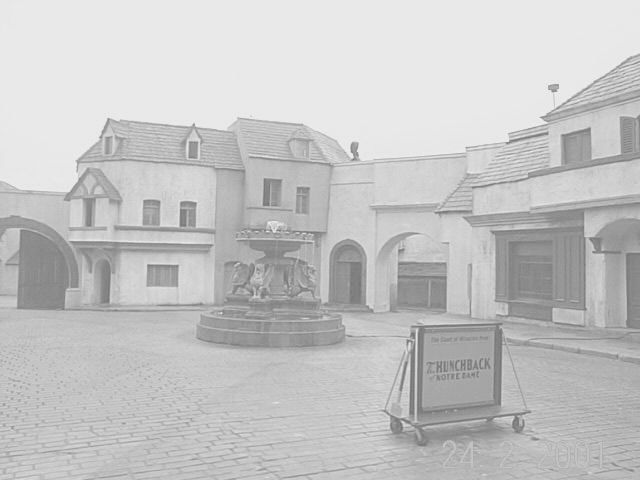

In [21]:
img = MImage('photos\\' + 'hollywoodLC.jpg')
img.Gamma_transformation(10, 0.6)
img.SaveJpg('hollywoodLC_Gamma.jpg')
img.Show()

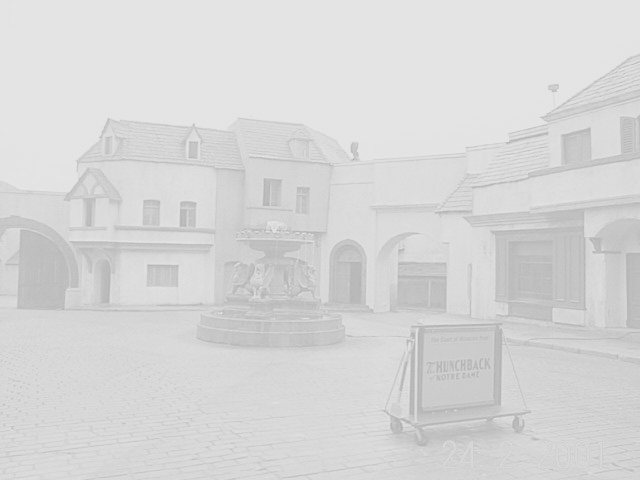

In [22]:
img = MImage('photos\\' + 'hollywoodLC.jpg')
img.Log_transformation(100)
img.SaveJpg('hollywoodLC_Log.jpg')
img.Show()